# Supervised learning

Let’s start by talking about a few examples of supervised learning problems.
Suppose we have a dataset giving the living areas and prices of 47 houses
from Portland, Oregon:

<img src='./images/data.png' width='400' alt=''>
Given data like this, how can we learn to predict the prices of other houses in Portland, as a function of the size of their living areas?
To establish notation for future use, we’ll use $x^{(i)}$ to denote the “input”
variables (living area in this example), also called input features, and $y^{(i)}$
to denote the “output” or target variable that we are trying to predict
(price). A pair $(x^{(i)} , y^{(i)} )$ is called a training example, and the dataset
that we’ll be using to learn—a list of m training examples ${(x^{(i)} , y^{(i)} ); i =
1, . . . , m}$—is called a training set. Note that the superscript “(i)” in the
notation is simply an index into the training set, and has nothing to do with
exponentiation. We will also use $X$ denote the space of input values, and $Y$
the space of output values.

To describe the supervised learning problem slightly more formally, our
goal is, given a training set, to learn a function $h:X\in Y$ so that $h(x)$ is a
“good” predictor for the corresponding value of y. For historical reasons, this
function h is called a hypothesis. Seen pictorially, the process is therefore
like this:
<img src='./images/hypothesis.png' width='300' alt=''>

When the target variable that we’re trying to predict is continuous, such
as in our housing example, we call the learning problem a regression prob-
lem. When y can take on only a small number of discrete values (such as
if, given the living area, we wanted to predict if a dwelling is a house or an
apartment, say), we call it a classification problem.

To perform supervised learning, we must decide how we’re going to rep-
resent functions/hypotheses h in a computer. As an initial choice, let’s say
we decide to approximate $y$ as a linear function of $x$:

$$h_{\theta} = \theta_0 + \theta_1x$$

Here, the $θ_i’s$ are the parameters (also called weights) parameterizing the
space of linear functions mapping from $X$ to $Y$. When there is no risk of
confusion, we will drop the $\theta$ subscript in $h_{\theta}(x)$, and write it more simply as
$h(x)$. To simplify our notation, we also introduce the convention of letting
$x_0 = 1$ (this is the intercept term), so that

$$h(x) = \sum_{i=1}^m \theta_ix_i = \theta^Tx$$

where on the right-hand side above we are viewing $\theta$ and $x$ both as vectors,
and here $n$ is the number of input variables (not counting $x_0$). Now, given a training set, how do we pick, or learn, the parameters $\theta$? One reasonable method seems to be to make $h(x)$ close to $y$, at least for the training examples we have. To formalize this, we will define a function that measures, for each value of the $θ’s$, how close the $h(x^{(i)})$'s are to the corresponding $y^{(i)}$'s. We define the cost or loss function $L(h({x}),y)$, is some measure of prediction error. There are many types of loss functions.
* L1-norm: $L(h({x}),y) = \|h({x}) - y\|_1$ -- city block distance -- lasso
* L2-norm: $L(h({x}),y) = \|h({x}) - y\|_2$ -- just the euclidian -- ridge
* p-norm: $L(h({x}),y) = \|h({x}) - y\|_p$ -- more generally speaking
* Square-error: $L(h({x}),y) = \|h({x}) - y\|_2^2$ -- used in linear regression and logistic regression
* Hinge-loss: $L(h({x}),y) = \text{max}(0,1-yh({x}))$ -- used in SVMs for classification.
* Exponential-loss: $L(h({x}),y) = e^{-yh({x})}$ -- used in adaboost for classification

The loss function is equal to the negated conditional log-likelihood
\begin{align*}
L(h({x}),y) &= - \log p(\mathcal{D}|{w})\\
&= - \sum_m \log p(y_m|{x}_m,{w})
\end{align*}

Given some data, we can approximate the expected risk with the empirical risk given by
\begin{align*}
R_{\mathcal{D}}(h) &= \frac{1}{m} \sum_m L(h({x}_m),y_m)
\end{align*}
Also, with infinite data, empirical risk is the expected risk
\begin{align*}
\lim_{m \to \infty} R_{\mathcal{D}}(h) &= R(h)
\end{align*}

This gives us an empirical risk (or cross-entropy) of
\begin{align*}
R_{\mathcal{D}}(h) = \frac{1}{m} \sum_m \|y_m - h({x})\|_2^2
\end{align*}
In this case, empirical risk is often referred to as the residual-sum-of-squares (RSS) or mean-square-error (MSE). The cost function used here defined as:

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2$$

We want to choose $\theta$ so as to minimize $J(\theta)$. To do so, let’s use a search
algorithm that starts with some “initial guess” for $\theta$, and that repeatedly
changes $\theta$ to make $J(\theta)$ smaller, until hopefully we converge to a value of
$\theta$ that minimizes $J(\theta)$. Specifically, let’s consider the gradient descent
algorithm, which starts with some initial $\theta$, and repeatedly performs the
update:

$$\theta_j = \theta_j - \alpha \frac{\partial}{\partial{\theta_{j}}}J(\theta)$$


(This update is simultaneously performed for all values of $j = 0, . . . , n.$)
Here, $\alpha$ is called the learning rate. This is a very natural algorithm that
repeatedly takes a step in the direction of steepest decrease of $J$.
In order to implement this algorithm, we have to work out what is the
partial derivative term on the right hand side. Let’s first work it out for the
case of if we have only one training example $(x, y)$, so that we can neglect
the sum in the definition of $J$. We have:
\begin{align}
\frac{\partial}{\partial{\theta_{j}}}J(\theta) &= \frac{\partial}{\partial{\theta_{j}}}\frac{1}{2}(h_{\theta}(x)-y)^2\\
&= 2.\frac{1}{2}(h_{\theta}(x)-y)\frac{\partial}{\partial{\theta_{j}}}(h_{\theta}(x)-y)\\
&= (h_{\theta}(x)-y)\frac{\partial}{\partial{\theta_{j}}}(\sum_{i=0}^{n}\theta_i x_i-y)\\
&= (h_{\theta}(x)-y)x_j
\end{align}

Using the rule for a single training example, we derive the gradient descent algorithm for linear regression:

\begin{align}
repeat \{\\
&\theta_j = \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)}).x^{(i)}_j\\
\}
\end{align}

Simultaneously update all values of $j = 0, . . . , n.$

#### Regularization
One problem that frequently occures in linear regression is overfitting. The standard solution for previnting overfitting is regularization. Since we know that the empirical risk will underestimate the true risk, add a penalty to complex functions $h$ to try to compensate for this. Then, instead of doing
$$
min_h R_D(h) = E\big[L(h({x}_n),y_n)\big]
$$

we can do
$$
min_h R_D(h) + \lambda h(\theta)
$$
Notice that we can rephrase this unconstrained linear optimization as an constrained optimization. For any given $\lambda$ there is a $c$ such that the same solution can be obtained from
$$
min_f R_D(h) \\
s.t.\;\;\;h(\theta) \le c
$$

**The Lasso estimator** is useful to impose sparsity on the coefficients. In other words, it is to be prefered if we believe that many of the features are not relevant.

$$\hat{\theta}_{lasso} = \text{argmin}_{\theta}\left\{\frac{1}{2}\sum_{i=1}^N (y_i - \sum_{j=0}^k x_{ij} \theta_j)^2 + \lambda \sum_{j=1}^k |\theta_j| \right\}$$

The **ridge estimator** is a simple, computationally efficient regularization for linear regression.

$$\hat{\theta}_{ridge} = \text{argmin}_{\theta}\left\{\sum_{i=1}^N (y_i - \sum_{j=0}^k x_{ij} \theta_j)^2 + \lambda \sum_{j=1}^k \theta_j^2 \right\}$$

**ElasticNet** is a compromise between lasso and ridge regression.

$$\hat{\theta}_{elastic} = \text{argmin}_{\theta}\left\{\frac{1}{2}\sum_{i=1}^N (y_i - \sum_{j=0}^k x_{ij} \theta_j)^2 + (1 - \alpha) \sum_{j=1}^k \theta^2_j + \alpha \sum_{j=1}^k |\theta_j| \right\}$$


### Normal equation
Method of solve for $\theta$ analytically. Intuition: Given a training set ${(x^{(i)} , y^{(i)} ); i =
1, . . . , m}$, We know the cost function for linear regression is
    
$$J(\theta) = \frac{1}{2}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2 = \frac{1}{2}(X\theta-\hat{y})^T(X\theta-\hat{y})$$

\begin{align*}
\nabla_{\theta}J(\theta) &= \nabla_{\theta} \frac{1}{2}(X\theta-\hat{y})^T(X\theta-\hat{y})\\
&= \frac{1}{2} \nabla_{\theta} (\theta^T X^T X\theta - \theta^TX^T\hat{y} - \hat{y}^TX\theta + \hat{y}^T\hat{y}) \\&= \frac{1}{2} \nabla_{\theta} \;{tr}(\theta^T X^T X\theta - \theta^TX^T\hat{y} - \hat{y}X\theta + \hat{y}^T\hat{y}) \\
&= \frac{1}{2} \nabla_{\theta} ({tr}(\theta^T X^T X\theta) - 2{tr}(\hat{y}^T X\theta)) \\
&= \frac{1}{2} \nabla_{\theta} (X^TX\theta + X^TX\theta - 2 X^T\hat{y}) \\
&= (X^TX\theta - X^T\hat{y}) \\
0 &= (X^TX\theta - X^T\hat{y}) \\
X^TX\theta &= X^T\hat{y}\\
\therefore \theta &= (X^TX)^{-1}X^T\hat{y}
\end{align*}

The value of $\theta$ that minimize $J(\theta)$ is given by the closed form equation above.

## Numerical Example

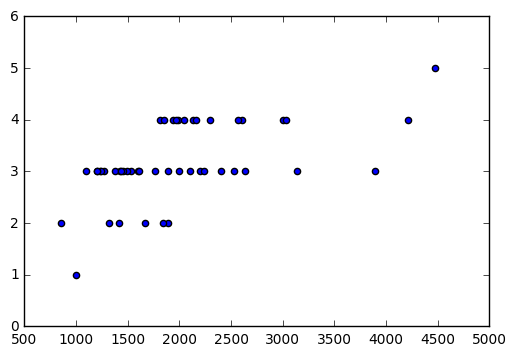

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis, r_, c_, mat
from numpy.linalg import *

data = np.loadtxt('./Data/ex1data2.txt', delimiter=',')
X = mat(data[:, :2])
y = c_[data[:, 2]]
m = X.shape[0]

plt.scatter(X[:,0],X[:,1])
plt.show()

### Feature Normalization
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).
#### Z-score normalization
The result of **standardization** (or **Z-score normalization**) is that the features will be rescaled so that they'll have the properties of a standard normal distribution with $\mu = 0$ and $\sigma = 1$, where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called ***z*** scores) of the samples are calculated as follows:

\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 

#### Min-Max scaling
Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. An alternative approach to Z-score normalization (or standardization) is the so-called **Min-Max scaling** (often also simply called "normalization" - a common cause for ambiguities). In this approach, the data is scaled to a fixed range - usually 0 to 1. The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

\begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

In [3]:
def featureNormalize(X):
    X_norm = X.A
 
    mu = X_norm.mean(axis=0)
    X_norm -= mu # broadcasting
 
    sigma = X_norm.std(axis=0)
    X_norm /= sigma
 
    return mat(X_norm), mu, sigma

\begin{align*}
h_{\theta} = y_{predicted} = {w}^T{x}
\end{align*}
\begin{align*}
J(\theta) = \frac{1}{2m} \sum_{i=1}^m (y_i - y_{predicted})^2
\end{align*}
Here, $\theta=w$

In [22]:
def computeCost(X, y, theta):
    m = X.shape[0]
 
    predictions = X*theta
    sqrErrors = (predictions - y).A ** 2
    return 1./(2*m) * sqrErrors.sum()

$$\theta_j = \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}).x^{(i)}_j$$

In [23]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = X.shape[0]
 
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = theta - alpha/m * X.T * (X*theta - y)
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history


#### Regularized ridge linear regression
\begin{align*}
\text{min}_{\theta}\;\; J(\theta) &= \frac{1}{2m} \sum_{i=1}^{m}\big[(h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta_j^2\big]\\
\theta_j &= \theta_j(1-\alpha\frac{\lambda}{m})-\alpha\frac{1}{2m} \sum_{i=1}^{m}[(h_{\theta}(x^{(i)}) - y^{(i)}).x_j^{(i)}
\end{align*}

In [19]:
def ridgeGradientDescent(X, y, theta, alpha, num_iters):
    m = X.shape[0]
 
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = theta - alpha/m * X.T * (X*theta - y)
        J_history[i] = computeCostMulti(X, y, theta)
    return theta, J_history

$$\theta_{MLE} = \left({X}^T{X}\right)^{-1}{X}^T{y}$$

In [20]:
#Closed form solution of linear regression
def normalEqn(X, y):
    theta = pinv(X.T * X) * X.T * y
    return theta

Normalizing Features ...


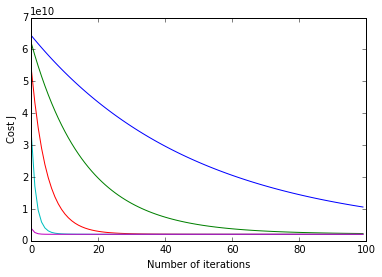

Theta (last) computed from gradient descent:
[[ 340412.65957447]
 [ 109447.79646964]
 [  -6578.35485416]]

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $293081.464335
Theta computed from the normal equations:
[[ 89597.90954435]
 [   139.21067402]
 [ -8738.01911278]]

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335


In [46]:
#Main Function
if __name__ == '__main__':
    data = np.loadtxt('./Data/ex1data2.txt', delimiter=',')
    X = mat(data[:, :2])
    y = c_[data[:, 2]]
    m = X.shape[0]
 
    #plt.plot(X[0],X[1])
    # =================== Part 1: Feature Normalization
    
 
    print('Normalizing Features ...')
    X, mu, sigma = featureNormalize(X)
 
    # =================== Part 2: Gradient descent
 
    X = c_[np.ones(m), X]
 
    iterations = 100
 
    for alpha in [0.01, 0.03, 0.1, 0.3, 1.]: # divergence at 3.0
        theta = c_[np.zeros(3)]
        theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
 
        # Plot the convergence graph
        plt.plot(r_[:iterations], J_history, linewidth=1)
 
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.show()
 
    print('Theta (last) computed from gradient descent:')
    print(theta)
    print('')
 
    house = [1650, 3]
    house = (house - mu) / sigma
    price = r_[1, house].dot(theta)
 
    print('Predicted price of a 1650 sq-ft, 3 br house ' \
          '(using gradient descent):\n $%f' % price)
 
    #raw_input('Press any key to continue\n')
 
    # =================== Part 3: Normal equations
 
    data = np.loadtxt('./Data/ex1data2.txt', delimiter=',')
    X = mat(data[:, :2])
    y = c_[data[:, 2]]
    m = X.shape[0]
 
    X = c_[np.ones(m), X]
 
    theta = normalEqn(X, y)
 
    print('Theta computed from the normal equations:')
    print(theta)
    print('')
 
    house = [1650, 3];
    price = r_[1, house].dot(theta);
 
    print('Predicted price of a 1650 sq-ft, 3 br house ' \
          '(using normal equations):\n $%f' % price)

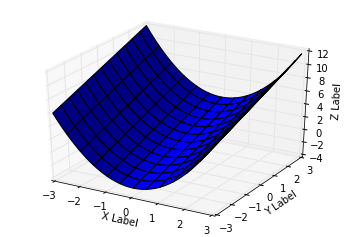

In [48]:
from mpl_toolkits.mplot3d import Axes3D

def fun(x, y):
  return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### Probabilistic Interpretation

The proper probabilistic way of deriving the solution to the weights is by maximizing the conditional likelihood or probability of seeing the data. By doing , we are creating a ${\it discriminative}$ model because we optimizing the conditional probability. Later on with Bayesian linear regression, we will create a ${\it generative}$ model by maximizing the complete likelihood (joint probability). 
\begin{align*}
\text{arg max}_{{w}} p(\mathcal{D}|{w}) = \text{arg max}_{{w}} \prod_n p(y_n|x_n,{w})
\end{align*}
To clean up the notion, we will leave out the weights in the probability and assume it is implied
\begin{align*}
\text{arg max}_{{w}} p(\mathcal{D}) = \text{arg max}_{{w}} \prod_n p(y_n|x_n)
\end{align*}
We assume a noisy observation model such that
\begin{align*}
y = {w}^T{x} + \eta
\end{align*}
where the noise, $\eta \sim N(0,\sigma^2)$ is zero mean gaussian noise. Thus for one training sample
\begin{align*}
p(y_n|x_n) &= N(y_n - {w}^T{x}, \sigma^2)\\
&= \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(y_n - {w}^T{x})^2}{2\sigma^2}}
\end{align*}
Now we can maximize the conditional likelihood. A common trick is to equivalently maximize log-likelihood. This turns products into sums which makes things easier.
\begin{align*}
\log p(\mathcal{D}) &=  \log \prod_n p(y_n|x_n)\\
&=  \sum_n \log p(y_n|x_n)\\
&=  \sum_n -\frac{(y_n - {w}^T{x})^2}{2\sigma^2} - \log\sigma\sqrt{2\pi}\\
\end{align*}
Now, to find the optimal weights, we take the derivative set to zero
\begin{align*}
\frac{\partial}{\partial {w}} \log p(\mathcal{D}) &\propto \frac{\partial}{\partial {w}} \sum_n (y_n - {w}^T{x})^2 = 0
\end{align*}
This means that $\text{arg max}_{{w}} \log p(\mathcal{D}) = \text{arg min}_{{w}} R_{\mathcal{D}}(f)$!
\begin{align*}
{w} &= \text{arg min}_{{w}} R_{\mathcal{D}}(f)\\
&= \text{arg min}_{{w}} \frac{1}{N} \sum_n (y_n - {w}^T{x}_n)^T(y_n - {w}^T{x}_n)\\
&= \text{arg min}_{{w}} \frac{1}{N} \sum_n {w}^T{x}_n{x}_n^T{w} - 2y_n{x}_n^T{w} + y_n^2\\
&= \text{arg min}_{{w}} \frac{1}{N} \left[ {w}^T \left(\sum_n {x}_n{x}_n^T\right){w} - 2\left(\sum_n y_n{x}_n^T\right){w} \right]+\text{constant}\\
&= \text{arg min}_{{w}} \frac{1}{N} \left[ {w}^T {X}^T{X}{w} - 2\left({X}^T{y}\right){w} \right]+\text{constant}\\
0 &= \frac{\partial}{\partial {w}} \frac{1}{N} \left[ {w}^T {X}^T{X}{w} - 2\left({X}^T{y}\right){w} \right]\\
{w}^{MLE} &= \left({X}^T{X}\right)^{-1}{X}^T{y} 
\end{align*}
The solution derived above is also known as the maximum likelihood estimation (MLE) solution or the least-mean-squares (LMS) solution.

Note that all of the different dimensions of the weights are independent. Also, the solution is independent of the noise, $\eta$.

Also note that we could use numerical optimization tools. What if $D$ is large? That matrix inversion may be intractable. Thankfully, the (empirical risk) objective function is convex
\begin{align*}
\frac{\partial R_{\mathcal{D}}(f)}{\partial {w}} &\propto {X}^T{X}{w} - 2{X}^T{y}\\
\frac{\partial^2 R_{\mathcal{D}}(f)}{\partial {w}{w}^T} &= {H}\\
&\propto {X}^T{X}
\end{align*}
This is positive semidefinite, thus proving convexity.

Linear regression can be extended to nonlinear regression using a basis function, ${\phi}({x})$, which transforms the data into a nonlinear basis. For example, given a dataset where $D=2$, we can use a nonlinear basis function to transform the data into a quadratic space
\begin{align*}
{\phi}({x}) \to \left[ \begin{array}{c} x_1\\x_2\\x_1^2\\x_1\cdot x_2\\ x_2^2 \end{array}\right]
\end{align*}
This allows us to fit a quadratic to our data using linear regression rather than simply a line. In this way, we are increasing the dimensionality of our data. However, this will be prone to overfitting. See section bias-variance about the trade-off between model complexity and overfitting.



### Bayesian Linear Regression
This is the full blown Bayesian treatment of linear regression. Bayesian methods can be applied all over the place. Conjugate priors make life a bit easier though its not necessary. However, for linear regression, all distributions are Gaussian which makes things nice and easy. 

First we define the likelihood as a normal distribution with some precision/variance due to noise
\begin{align*}
p(y|{x}) &= N({w}^T{x}, \beta^{-1})
\end{align*}
$\beta$ is known as precision and is the inverse of the variance of the noise (remember $\eta \sim N(0,\sigma^2)$). We also define a prior that tries urge a simpler model.
\begin{align*}
p({w}) = N({0},\alpha^{-1}{I})
\end{align*}
Our prior suggests that ${w}$ is around zero resulting in a simple model. $\alpha$ is the precision that tells us how confident we think we are about where ${w}$ is centered. Given this prior (the weights centered at zero), $\alpha$ defines how simple out model ought to be.

Now to derive the maximum a posterior solution
\begin{align*}
p({w}|\mathcal{D}) &\propto p({w})  p(y|{x}, {w})\\
&\propto N({w}|{0}, \alpha^{-1}) \times \prod_n N(y_n|{w}^T{x}_n, \beta^{-1})\\
&\propto \exp{- \frac{\alpha}{2}{w}^T{w} - \frac{\beta}{2}\sum_n(y_n - {w}^T{x}_n)^2} \\
&\propto \exp{ - \frac{1}{2}({w} - {\mu})^T{\Sigma}^{-1}({w} - {\mu})}\\
&\propto N({w}|{\mu}, {\Sigma})
\end{align*}
The last step involves completing the square.
\begin{align*}
{\Sigma} &= \left(\alpha {I} + \beta {X}^T{X}\right)^{-1}\\
{\mu} &= \beta {\Sigma} {X}^T {y}
\end{align*}
Note that we derived what the MAP solution is proportional to. That is because the evidence is just a constant. If we were to maximize the log posterior probability, we would be left with ${w} = {\mu}$. This is the same solution as we saw before for ridge regression only this time we also have our confidence in that solution. 

Next, we derive the predictive distribution for a new data point
\begin{align*}
p(y|{x}, \mathcal{D}) &= \int \text{likelihood} \times \text{posterior } d{w}\\
&= \int p(y|{x}, {w}) p({w}|\mathcal{D})d{w}\\
&\propto \int \exp{-\frac{\beta}{2}(y - {w}^T{x})^2 - \frac{1}{2}({w} - {\mu})^T{\Sigma}^{-1}({w} - {\mu})}d{w}\\
 &\propto N(y|{\mu}^T{x}, \beta^{-1} + {x}^T{\Sigma}{x}) \\
 &\propto N(y|{\mu}^T{x},\sigma^2({x})
 \end{align*}
What we are left with is same prediction as before, ${\mu}^T{x}$, but now we also have a confidence for each data point, $\sigma^2({x})$! This allows you to plot your regression curve along with error bounds indicating confidence in any region of the curve.

So how do we choose $\alpha$ and $\beta$? There is no analytical solution. There are some iterative procedures involving eigendecomposition, but in practice, they are tuned as hyperparameters of the model using cross-validation.

A huge benefit of Bayesian linear regression is that we can update the model with new data without recalculating computing all of the training data. When we first train the model on the training data and get a posterior, we can use that as the prior to compute a new posterior with new data!

Another benefit is that we treat every prediction as an independent gaussian process and thus we can compute the confidence in each prediction given by $\sigma^2({x})$.